In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
path = 'C:/Users/asaad/Desktop/FastAI/testing/data'

In [4]:
person = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [5]:
dls = person.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


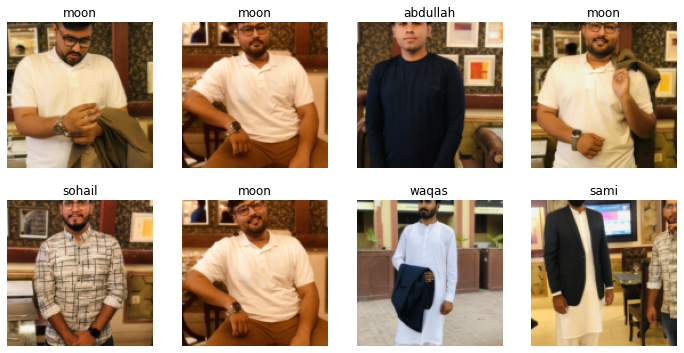

In [6]:
dls.valid.show_batch(max_n=10, nrows=2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


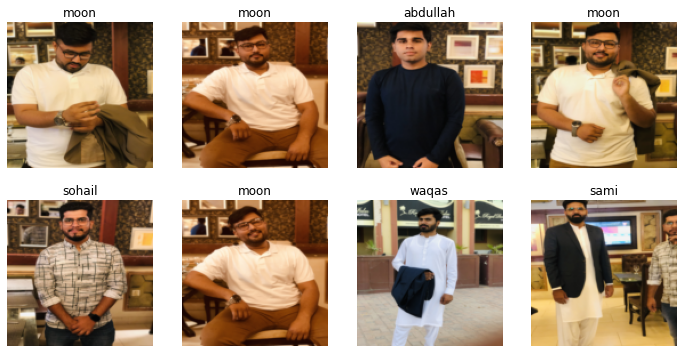

In [7]:
person = person.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = person.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


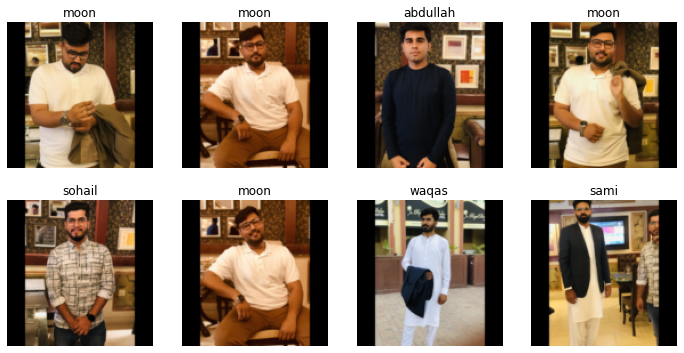

In [8]:
person = person.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = person.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


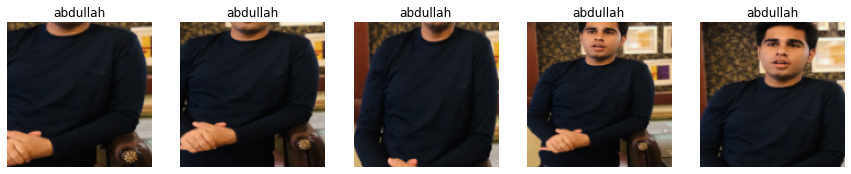

In [9]:
person = person.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = person.dataloaders(path, bs=5)
dls.train.show_batch(max_n=5, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


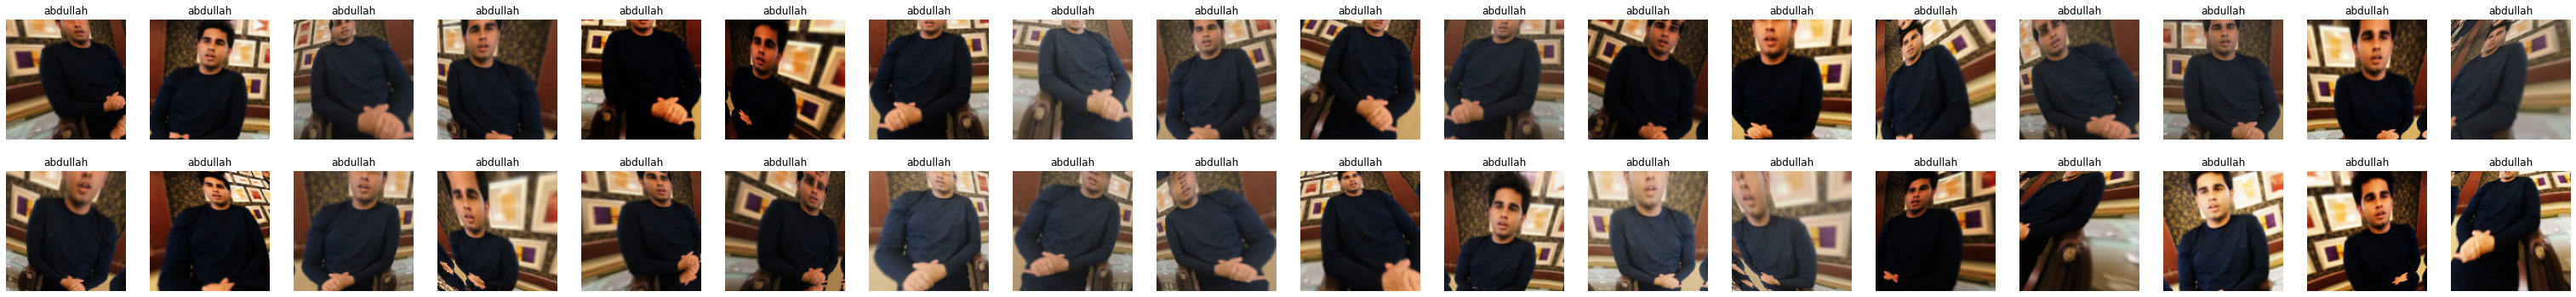

In [10]:
person = person.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = person.dataloaders(path, bs=36)
dls.train.show_batch(max_n=36, nrows=2, unique=True)

In [11]:
person = person.new(item_tfms=RandomResizedCrop(224, min_scale=0.3), batch_tfms=aug_transforms())
dls = person.dataloaders(path, bs=5)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


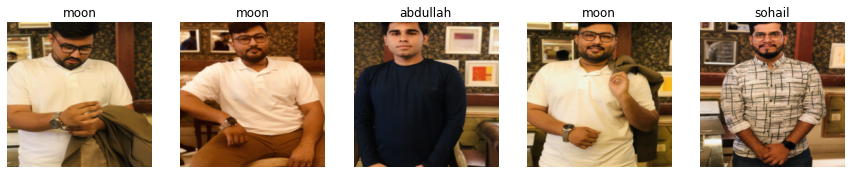

In [12]:
dls.valid.show_batch(max_n=10, nrows=1)

In [13]:
# dls.train.show_batch(max_n=10, nrows=1, unique=True)

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.528758,2.202332,0.750000,00:12


epoch,train_loss,valid_loss,error_rate,time
0,1.751470,0.968621,0.250000,00:14
1,1.642966,0.503615,0.125000,00:15
2,1.205560,0.238532,0.125000,00:14
3,1.032993,0.164431,0.125000,00:15
4,0.998247,0.144357,0.125000,00:15


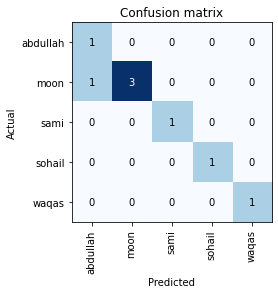

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

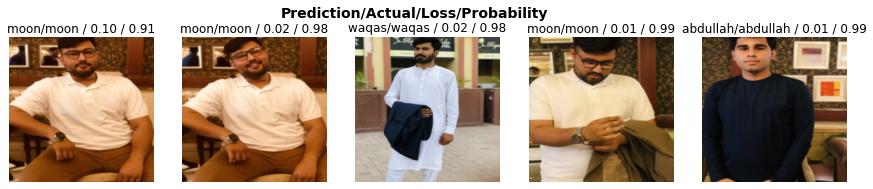

In [33]:
interp.plot_top_losses(5, nrows=1)

In [34]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [35]:
learn.export()

In [16]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [17]:
learn_inf = load_learner(path/'export.pkl')

In [18]:
learn_inf.predict('F:/Class-BSSE/Farewell[2k18-2k22]/IMG_4204.jpg')

('waqas', TensorBase(4), TensorBase([0.0036, 0.0062, 0.0079, 0.1622, 0.8202]))

In [19]:
learn_inf.dls.vocab

['abdullah', 'moon', 'sami', 'sohail', 'waqas']

In [20]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [21]:
img = PILImage.create(btn_upload.data[-1])
img

IndexError: list index out of range

In [22]:
out_pl = widgets.Output()
out_pl.clear_output()
out_pl

Output()

In [67]:
with out_pl: display(img.to_thumb(128, 128))

In [23]:
pred, pred_idx, probs = learn_inf.predict(img)

NameError: name 'img' is not defined

In [24]:
probs

NameError: name 'probs' is not defined

In [25]:
lbl_pred = widgets.Label()
# lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]: .04f}'
lbl_pred.value = 'Please choose an image'
lbl_pred

Label(value='Please choose an image')

In [26]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [27]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [28]:
btn_upload = widgets.FileUpload()

In [29]:
VBox([widgets.Label('Select your Person!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [31]:
!jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: C:\Users\asaad\Desktop\FastAI\fastenv\etc\jupyter
    - Validating...
      voila 0.3.5 ok
